<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/main/1121_DrumExtract%2BOnset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install PyWavelets librosa matplotlib numpy
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 필수 라이브러리 설치
!pip install librosa numpy matplotlib



'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

MagicCarpetRide_drum.mp3

Every Day.mp3

music.mp3 //꿈나라별나라

In [ ]:
audio_path = '/content/drive/My Drive/soundAI/MagicCarpetRide_drum.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


# PLCA

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


# STFT 변환
n_fft = 2048  # FFT 크기
hop_length = 512  # 윈도우 이동 간격
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# STFT 스펙트로그램 생성
spectrogram = np.abs(stft_result)  # 복소수 -> 절대값


In [ ]:
# 드럼 요소별 주파수 대역 (Hz)
drum_frequencies = {
    "Ride Cymbal": (300, 4000),
    "Crash Cymbal": (400, 8000),
    "Hi-Hat": (2000, 8000),
    "Snare Drum": (100, 2000),
    "Kick Drum": (20, 100),
    "Floor Tom": (50, 200),
    "Mid Tom": (80, 300),
    "High Tom": (100, 400),
}

# 필터링 함수
def filter_spectrogram(spectrogram, sr, freq_range):
    """주파수 대역 필터링"""
    freq_bins = np.linspace(0, sr // 2, spectrogram.shape[0])  # STFT 주파수 축
    min_idx = np.searchsorted(freq_bins, freq_range[0])  # 최소 주파수 인덱스
    max_idx = np.searchsorted(freq_bins, freq_range[1])  # 최대 주파수 인덱스
    return spectrogram[min_idx:max_idx]

# 드럼 요소별 스펙트로그램 추출
filtered_spectrograms = {}
for drum, freq_range in drum_frequencies.items():
    filtered_spectrograms[drum] = filter_spectrogram(spectrogram, sr, freq_range)
    print(f"{drum} filtered spectrogram shape: {filtered_spectrograms[drum].shape}")


Ride Cymbal filtered spectrogram shape: (172, 18449)
Crash Cymbal filtered spectrogram shape: (353, 18449)
Hi-Hat filtered spectrogram shape: (279, 18449)
Snare Drum filtered spectrogram shape: (88, 18449)
Kick Drum filtered spectrogram shape: (4, 18449)
Floor Tom filtered spectrogram shape: (7, 18449)
Mid Tom filtered spectrogram shape: (10, 18449)
High Tom filtered spectrogram shape: (14, 18449)


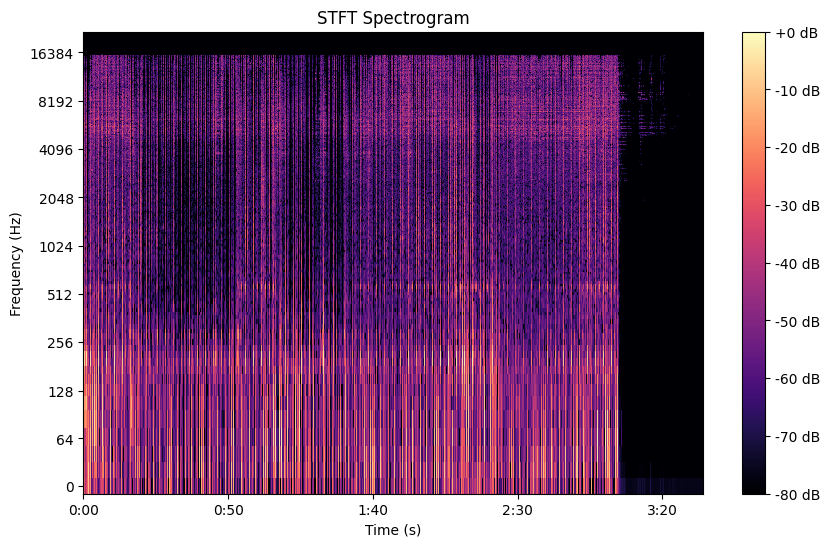

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                         sr=sr, hop_length=hop_length, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("STFT Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


# onset detection